<a href="https://colab.research.google.com/github/NadyaPutriAmalia/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MODUL 10-GLOBAL THRESHOLDING**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [ ]:
import cv2
import numpy as np
# import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas

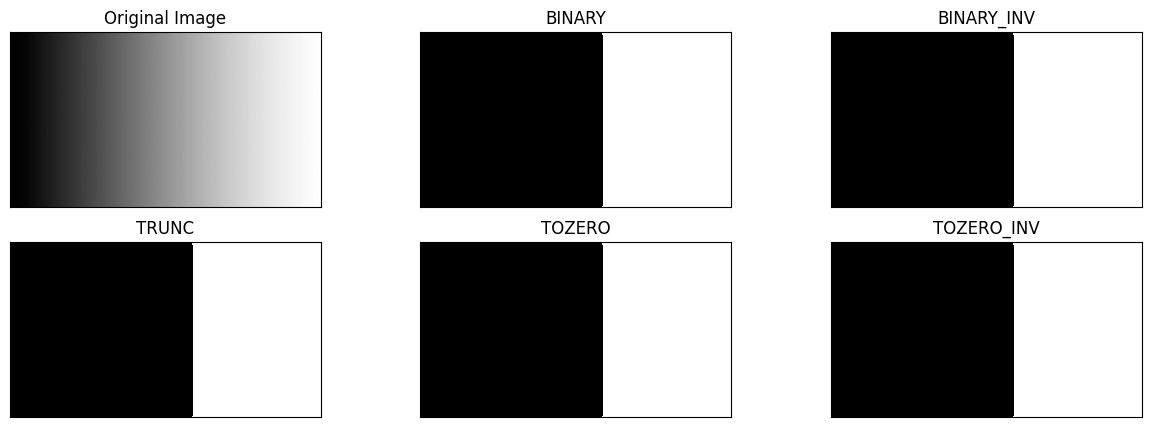

In [ ]:
# import gambar gradient

gradient_img = ('/content/drive/MyDrive/PCVK/image_thres/gradient.jpg')

img = cv2.imread(gradient_img)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>170, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret, thresh1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#3. Threshold Truncate
ret, thresh3 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#4. Threshold Tozero
ret, thresh4 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#5. Threshold Tozero Inverse
ret, thresh5 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-5-b6302a62730d>:19: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


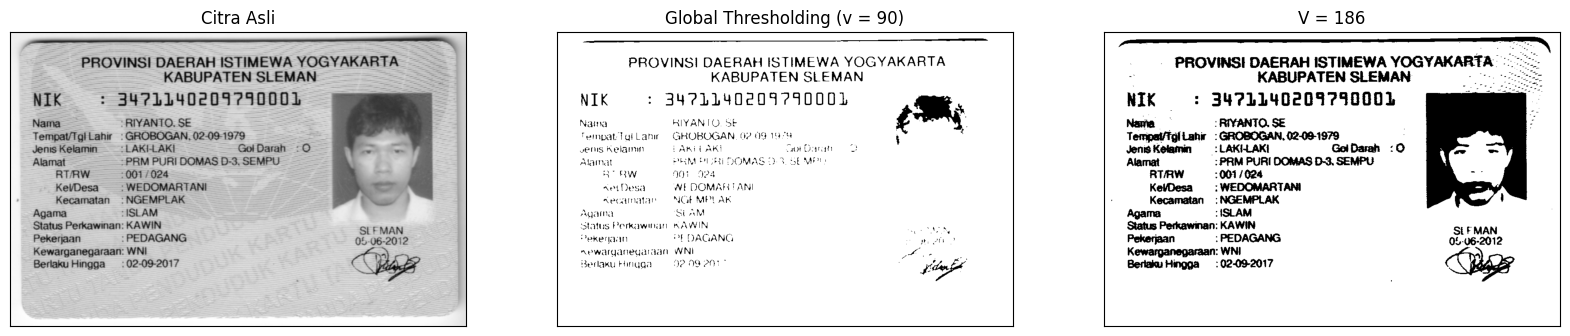

In [ ]:
ballon_img = '/content/drive/MyDrive/PCVK/KTP_More/ktp.png'
img = cv2.imread(ballon_img, 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = float('inf')
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img.shape[0] * img.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)
    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

x = "V = 186"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, 167, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images. Petunjuk:  
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.  
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html   
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

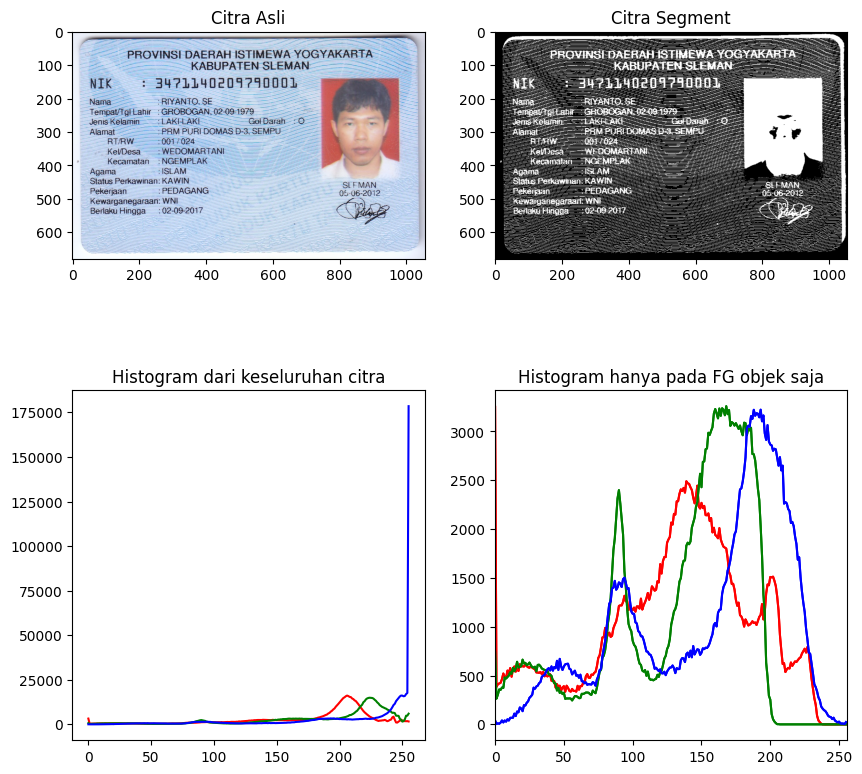

In [ ]:
# load the image in BGR format
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()


6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

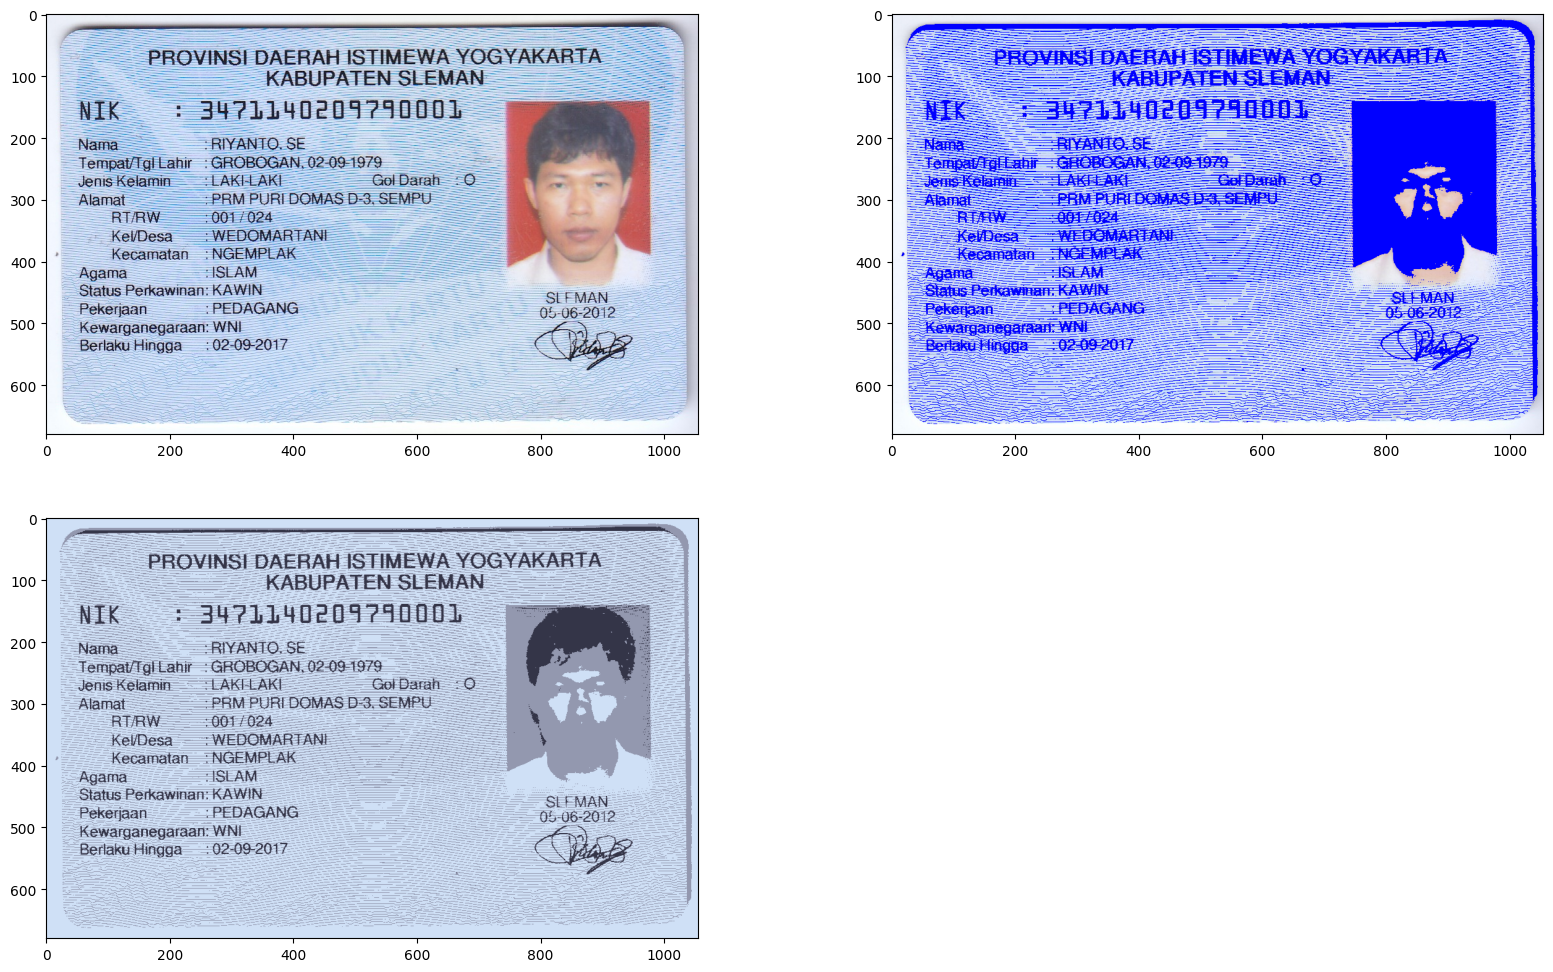

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0= masked_image.reshape((-1, 3))
cluster = 2
masked_image0[labels != cluster] = [0, 0, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

plt.show()

##**E. Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.**

1. Instal PIP OCR

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,565 kB/s)
debconf: unable to ini

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

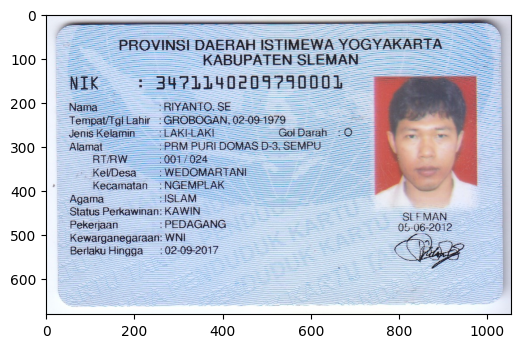

In [ ]:
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (6,5))
plt.subplot(1,1,1),plt.imshow(img)

plt.show()

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [ ]:
import pytesseract
from PIL import Image

filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Gunakan pytesseract untuk mengenali teks
recognized_text = pytesseract.image_to_string(img, lang='eng')

# Cetak teks yang dikenali
print(recognized_text)

# Simpan teks yang dikenali ke dalam file
with open('output.txt', 'w') as file:
    file.write(recognized_text)

4. Menambahkan kotak untuk deteksi teks pada gambar

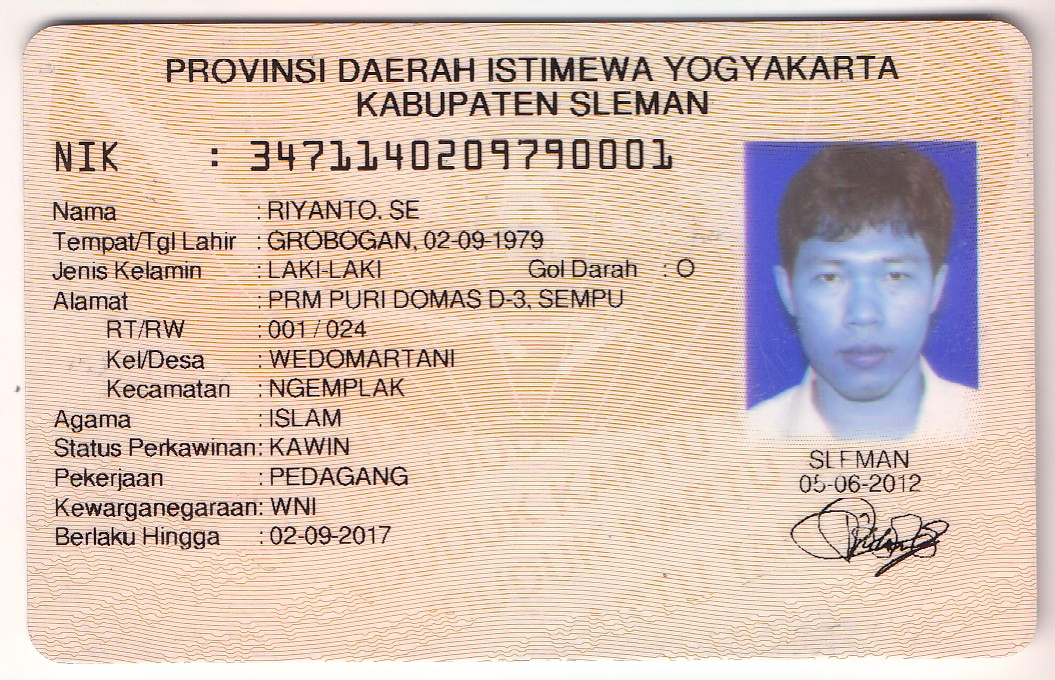

In [ ]:
import cv2
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow

filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Konversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gunakan pytesseract untuk mendeteksi teks
custom_config = r'--oem 3 --psm 6'
details = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT, config=custom_config)

# Loop melalui setiap deteksi teks dan tambahkan kotak
for i in range(len(details['text'])):
    if int(details['conf'][i]) > 60:  # Hanya menampilkan teks dengan confidence > 60
        (x, y, w, h) = (details['left'][i], details['top'][i], details['width'][i], details['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Tampilkan gambar yang telah diberi kotak
cv2_imshow(img)


5. Hasil pembacaan KTP menjadi text

##**F. Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan  GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP.**

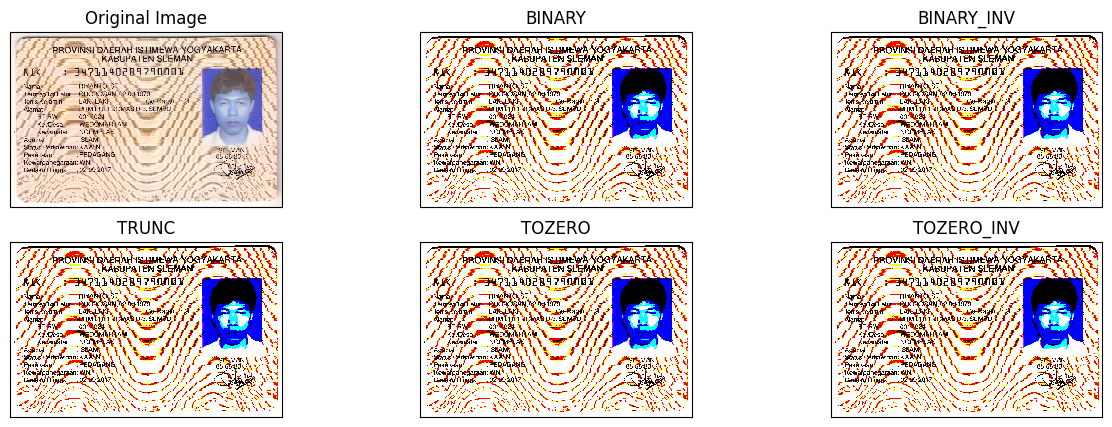

In [ ]:
# import gambar gradient

gradient_img = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')

img = cv2.imread(gradient_img)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret, thresh1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#3. Threshold Truncate
ret, thresh3 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#4. Threshold Tozero
ret, thresh4 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
#5. Threshold Tozero Inverse
ret, thresh5 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])